In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Reading Data


In [ ]:
data_dic=pd.read_excel('/content/drive/MyDrive/Data Dictionary.xlsx')
df=pd.read_csv('/content/drive/MyDrive/cubic_zirconia.csv')

In [ ]:
data_dic

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,cubic zirconia Clarity refers to the absence ...
4,Depth,"The Height of a cubic zirconia, measured from..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


In [ ]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

### Univariate Data Exploratory Analysis

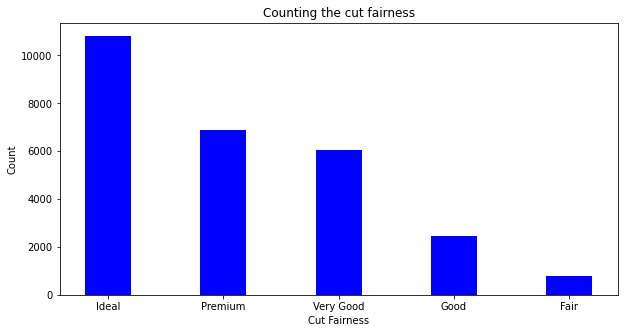

In [ ]:
# COUNTING EACH OCCURANCE IN CUT
x=dict(df['cut'].value_counts())
fig = plt.figure(figsize = (10, 5))
plt.bar(list(x.keys()), list(x.values()), color ='blue',width = 0.4)
plt.xlabel("Cut Fairness")
plt.ylabel("Count")
plt.title("Counting the cut fairness")
plt.show()

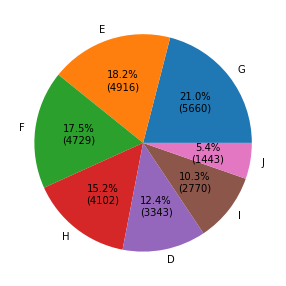

In [ ]:
x=dict(df['color'].value_counts())
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig = plt.figure(figsize = (10, 5))
plt.pie(list(x.values()),labels=(list(x.keys())),autopct = lambda pct: func(pct, list(x.values())))
plt.show()

### Bivariate Data Exploratory Analysis

In [ ]:
fig = plt.figure(figsize = (5, 5))
plt.bar(df['price'],df['cut'])
plt.xlabel("Price")
plt.ylabel("Cut Fairness")
plt.title("Price according to the cut fairness")
plt.show()

'\nfig = plt.figure(figsize = (5, 5))\nplt.bar(df[\'price\'],df[\'cut\'])\nplt.xlabel("Price")\nplt.ylabel("Cut Fairness")\nplt.title("Price according to the cut fairness")\nplt.show()\n'

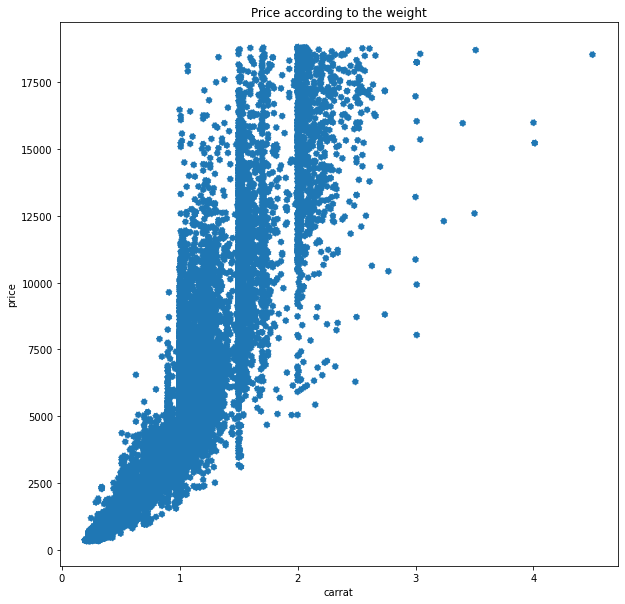

In [ ]:
fig = plt.figure(figsize = (10,10))
plt.scatter(df['carat'],df['price'],linestyle = 'dotted')
plt.xlabel("carrat")
plt.ylabel("price")
plt.title("Price according to the weight")
plt.show()

In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### CORRELATION 

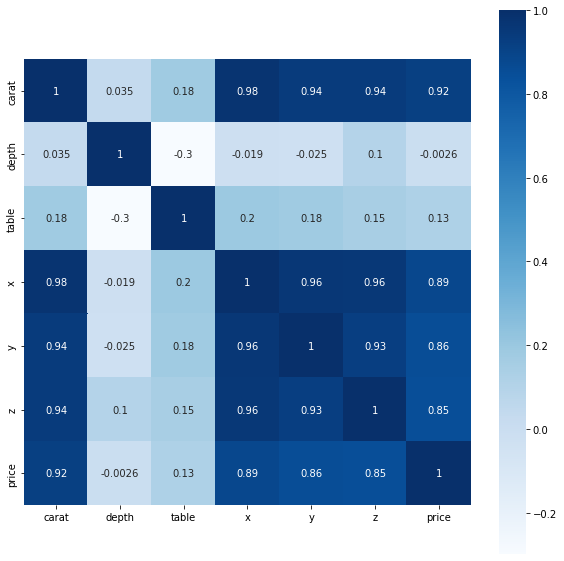

In [ ]:
correlation=df.corr()
figure=plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap='Blues',annot=True,cbar=True,annot_kws={'size':10},square=True)

### LABEL ENCODING AND STANDARDISING THE FEATURES


In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
cutlabel=LabelEncoder()
colorlabel=LabelEncoder()
claritylabel=LabelEncoder()
df['cut']=cutlabel.fit_transform(df['cut'])
df['color']=colorlabel.fit_transform(df['color'])
df['clarity']=claritylabel.fit_transform(df['clarity'])
from sklearn.decomposition import PCA
scaler=StandardScaler().fit(df)
df1=scaler.transform(df)
df2 = pd.DataFrame(df1,
              columns=list(df.columns),
              index=df.index)
df2['cut']=df['cut']
df2['color']=df['color']
df2['clarity']=df['clarity']
df=df2.copy()

In [ ]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.043201,2,1,2,0.251164,0.243689,-1.293628,-1.238014,-1.218491,-0.854832
1,-0.980405,3,3,1,-0.668972,0.243689,-1.160708,-1.092221,-1.162983,-0.734329
2,0.212721,4,1,7,0.321944,1.139736,0.274832,0.331406,0.335747,0.583753
3,-0.792017,2,2,4,-0.102734,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979
4,-1.022269,2,2,6,-0.952091,0.691712,-1.222737,-1.117949,-1.232368,-0.785263
...,...,...,...,...,...,...,...,...,...,...
26962,0.652294,3,3,2,0.392724,0.243689,0.779929,0.674449,0.765938,0.364859
26963,-0.980405,2,4,1,0.109605,-1.100381,-1.142985,-1.126525,-1.107474,-0.702029
26964,-0.603628,3,1,5,-0.031955,0.243689,-0.540413,-0.500472,-0.510758,-0.567363
26965,-1.105997,4,2,7,0.038825,-0.652358,-1.364519,-1.315199,-1.301754,-0.809363


INVERSE TRANSFORMATION

In [ ]:
cut=list(df['cut'].unique())
x=cutlabel.inverse_transform(cut)
color=list(df['color'].unique())
y=colorlabel.inverse_transform(color)
clarity=list(df['clarity'].unique())
z=claritylabel.inverse_transform(clarity)
print(x,y,z)

['Ideal' 'Premium' 'Very Good' 'Good' 'Fair'] ['E' 'G' 'F' 'D' 'H' 'J' 'I'] ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


### HANDLING NULL VALUES

In [ ]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [ ]:
df.fillna(df['depth'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,2.696700e+04,26967.000000,26967.000000,26967.000000,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04,2.696700e+04
mean,-1.614017e-16,2.554604,2.606111,3.833537,-5.598333e-15,-2.982727e-15,5.350331e-16,-8.057238e-16,-2.124932e-16,-2.910285e-17
std,1.000019e+00,1.024243,1.705992,1.724904,9.870105e-01,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.252522e+00,0.000000,0.000000,0.000000,-7.746948e+00,-3.788521e+00,-5.077427e+00,-4.917146e+00,-4.909807e+00,-8.978153e-01
25%,-8.338809e-01,2.000000,1.000000,2.000000,-4.566332e-01,-6.523577e-01,-9.037285e-01,-8.778193e-01,-8.854401e-01,-7.440185e-01
50%,-2.059198e-01,2.000000,3.000000,4.000000,3.882513e-02,-2.043343e-01,-3.531563e-02,-2.021276e-02,-2.505828e-02,-3.887204e-01
75%,5.267015e-01,3.000000,4.000000,5.000000,5.342834e-01,6.917124e-01,7.267610e-01,6.916007e-01,6.965523e-01,3.529332e-01
max,7.748254e+00,4.000000,6.000000,7.000000,8.390836e+00,9.652179e+00,3.987740e+00,4.559588e+01,3.921946e+01,3.696710e+00


### REGRESSION MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=df.drop(['price'],axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
linear=LinearRegression().fit(x_train,y_train)
print('Coefficients: ', linear.coef_)
print('Prediction score: {}'.format(round(linear.score(x_test, y_test)*100,2)))

Coefficients:  [ 1.30222493  0.01474848 -0.06794004  0.07261903 -0.05270431 -0.0526942
 -0.31770725  0.00394549 -0.0057546 ]
Prediction score: 88.74


### RESIDUAL ERROR

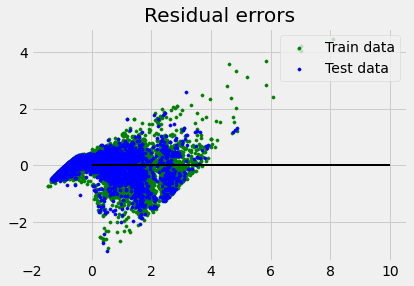

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(linear.predict(x_train), linear.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')
plt.scatter(linear.predict(x_test), linear.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()